chosen example: 

VAE: clean-gull-718 (Run id: a75dc5ac2d4e443585bc79d76efa02ac)
    beta_start = 0.001
    
PELS-VAE: rare-moth-313 (b93b3cd3d3eb4b079274268e82d01259)

In [27]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import h5py
from pathlib import Path
import os
import sys
sys.path.append(os.getcwd() + '/../..')
sys.path.append(os.getcwd() + '/..')
from filepaths import filepath_from_ml_artifacts_uri
from analysis.iclr.plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
from plot_hdf5_dataset import plot_dataset
from iclr_paper_path import get_paper_path
import matplotlib
settings()
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
VAE = True

path_dataset_vae = 'data/clean_gull_718/artifacts/dataset.hdf5' if VAE else 'data/rare_moth_313/artifacts/dataset.hdf5'

if VAE:
    path_dataset_vae = filepath_from_ml_artifacts_uri('mlflow-artifacts:/595842590057669767/a75dc5ac2d4e443585bc79d76efa02ac/artifacts/dataset.hdf5')
else:
    path_dataset_vae = filepath_from_ml_artifacts_uri('mlflow-artifacts:/595842590057669767/b93b3cd3d3eb4b079274268e82d01259/artifacts/dataset.hdf5')

In [29]:
dataset = h5py.File(path_dataset_vae, 'r')
print(dataset.keys())

<KeysViewHDF5 ['common_test', 'common_validation', 'outputs_names', 'parameters_names', 'states_der_names', 'states_names', 'test', 'time', 'train', 'validation']>


In [30]:
kl_test = dataset['common_test']['kl_loss_raw'][:]
mu_test = dataset['common_test']['mu_hat'][:]
logvar_test = dataset['common_test']['logvar_hat'][:]
var_test = np.exp(logvar_test)
std_test = np.sqrt(var_test)

use_logvar = False

In [31]:
kl_test[:,].shape

(246, 512)

finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\dim_red_heatmap.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\dim_red_heatmap.svg


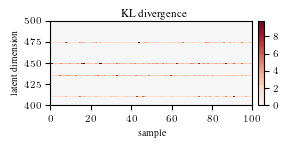

In [32]:
fig = plt.figure(figsize=fig_size(1.1, n_figs_per_width=2), tight_layout=True)

# set title
fig.suptitle('KL divergence', fontsize=8)

grid_spec = matplotlib.gridspec.GridSpec(1, 2, hspace=0.1, width_ratios=[1,0.03], wspace=0.05)
ax1 = fig.add_subplot(grid_spec[0])
ax11 = fig.add_subplot(grid_spec[1])
# ax2 = fig.add_subplot(grid_spec[2])
# ax22 = fig.add_subplot(grid_spec[3])
# ax2.sharex(ax1)

# plot a heatmap of the KL divergence
ax1.imshow(kl_test.T, aspect='auto', cmap='RdBu_r', vmin=-10, vmax=10, interpolation='none')
if VAE:
    ax1.set_ylim(400,500)
else:
    ax1.set_ylim(30,110)
ax1.set_ylabel('latent dimension')
ax1.set_xlim(0, kl_test.shape[0])
# ax1.set_xticklabels([])
# add a colorbar
cbar = plt.colorbar(ax1.images[0], cax=ax11, orientation='vertical', boundaries=np.arange(0,10,0.2), ticks=np.arange(0,12,2))

ax1.set_xlim(0, 100)
ax1.set_xlabel('sample')

# # set all font sizes to fontsize
# for ax in [ax1, ax11]:
#     for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#                  ax.get_xticklabels() + ax.get_yticklabels()):
#         item.set_fontsize(fontsize)

# # plot kl sum
# kl_test_sum = np.sum(kl_test, axis=1)
# ax2.plot(kl_test_sum, color='black', lw=0.5)
# ax2.set_xlim(0, kl_test_sum.shape[0])
# ax2.set_xlabel('Sample')
# ax2.set_ylim(0,50)
# ax2.set_ylabel('KL Sum')

# # remove ax22
# ax22.axis('off')

# savefig 
if VAE:
    savefig(fig, get_paper_path('VAE', 'dim_red_heatmap'))

In [33]:
# x_axis = threshold
# y_axis = number of active dimensions
thresholds = np.linspace(0.00, 4, 1000)
num_active_dims = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    idx = kl_test > threshold
    sum_per_sample = np.sum(idx, axis=1)
    num_active_dims[i] = np.mean(sum_per_sample)

finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\dim_red_threshold.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\VAE\dim_red_threshold.svg


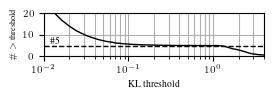

In [50]:
fig, ax = plt.subplots(figsize=fig_size(1.0, n_figs_per_width=2), tight_layout=True)
ax.plot(thresholds, num_active_dims, color='black', lw=1.0)
ax.set_xlabel('KL threshold')
ax.set_ylabel(r'$\# >$ threshold', fontsize=6)
#ax.set_yscale('log')
ax.set_ylim(0,20)
ax.set_xscale('log')
ax.set_xlim(0.01, 4)
ax.grid(True, which='both', axis='both')

# draw horizontal line at 5
ax.axhline(5, color='black', linestyle='--', lw=1.0)
# add text
ax.text(0.012, 5.75, '\#5')

fig.tight_layout()

if VAE:
    savefig(fig, get_paper_path('VAE', 'dim_red_threshold'))
else:
    pass
    # savefig(fig, get_paper_path('AE', 'dim_red_threshold'))

(0.01, 1.3)

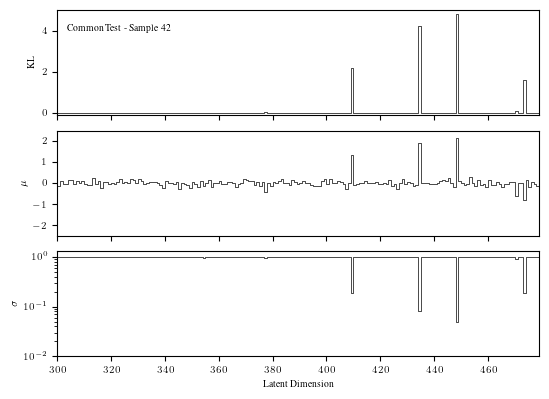

In [42]:
# plot an example of kl, mu and logvar
fig, ax = plt.subplots(3,1, figsize=fig_size(4.0), sharex=True, tight_layout=True)
sample_id = 42
min_dim = 300 if VAE else 30
max_dim = 480 if VAE else 110
_kl_test = kl_test[:,min_dim:max_dim]
_mu_test = mu_test[:,min_dim:max_dim]
_logvar_test = logvar_test[:,min_dim:max_dim]
x = np.arange(min_dim,max_dim)
# x = np.arange(0, kl_test.shape[1])
ax[0].step(x,_kl_test[sample_id,:], color='black', lw=0.5)
ax[0].set_ylabel('KL')
ax[1].step(x,_mu_test[sample_id,:], color='black', lw=0.5)
ax[1].set_ylabel(r'$\mu$')
if use_logvar: 
    ax[2].step(x,_logvar_test[sample_id,:], color='black', lw=0.5)
    ax[2].set_ylabel(r'$\log \sigma^2$')
else:
    ax[2].step(x,np.sqrt(np.exp(_logvar_test[sample_id,:])), color='black', lw=0.5)
    ax[2].set_ylabel(r'$\sigma$')
    ax[2].set_yscale('log')
ax[2].set_xlabel('Latent Dimension')
ax[2].set_xlim(min_dim,max_dim-1)
# add sample id to plot
ax[0].text(0.02, 0.8, 'Common Test - Sample {}'.format(sample_id), transform=ax[0].transAxes)

# fix axes
ax[0].set_ylim(-0.1, 5)
ax[1].set_ylim(-2.5, 2.5)
ax[2].set_ylim(1e-2, 1.3)

In [ ]:
# # save figure
# if VAE:
#     savefig(fig, '../../../../latex/thesis_chapters/figures/Methods/VAE/kl_mu_logvar_example_VAE')
# else:
#     savefig(fig, '../../../../latex/thesis_chapters/figures/Methods/VAE/kl_mu_logvar_example_PELS')

(512,)
[449 435 107 410 474 471 193]


Text(0.5, 1.0, 'KL distribution density')

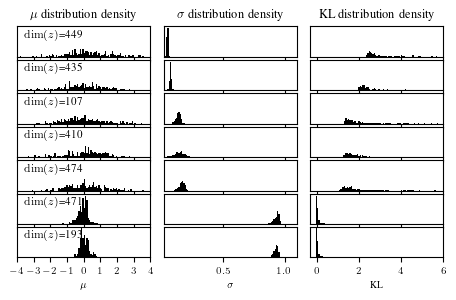

In [48]:
# plot mu and logvar distribution for specific dimension
kl_test_mean_per_dim = np.mean(kl_test, axis=0)
print(kl_test_mean_per_dim.shape)
plot_dims = np.argsort(kl_test_mean_per_dim)
# reverse order
plot_dims = plot_dims[::-1]
# choose first 9
plot_dims = plot_dims[0:7]
print(plot_dims)

fig, ax = plt.subplots(plot_dims.shape[0],3, figsize=fig_size(3.0), sharex='col', sharey='col', gridspec_kw={'hspace':0.1, 'wspace':0.1}, tight_layout=True)

for i, dim in enumerate(plot_dims):
    ax[i,0].hist(mu_test[:,dim], range=(-4,4), bins=100, color='black', density=True)
    ax[i,0].set_xlabel(r'$\mu$')
    ax[i,0].set_yticks([])
    ax[i,0].set_xlim(-4,4)
    ax[i,0].set_xticks([-4,-3,-2,-1,0,1,2,3,4])
    if use_logvar:
        ax[i,1].hist(logvar_test[:,dim], range=(-7,0.1), bins=100, color='black', density=True)
        ax[i,1].set_xlabel(r'$\log \sigma^2$')
        ax[i,1].set_yticks([])
        ax[i,1].set_xlim(-7,0.1)
        ax[i,1].set_xticks([-7,-5,-3,-1,0])
    else:
        ax[i,1].hist(std_test[:,dim], range=(0,1), bins=100, color='black', density=True)
        ax[i,1].set_xlabel(r'$\sigma$')
        ax[i,1].set_yticks([])
        ax[i,1].set_xlim(2e-2, 1.1)
        # ax[i,1].set_xscale('log')
        #ax[i,1].set_xticks([0
    # kl distribution
    ax[i,2].hist(kl_test[:,dim], range=(-0.1,6), bins=100, color='black', density=True)
    # plot dimension number
    ax[i,0].text(0.05, 0.90, r'$\mathrm{dim}(z)$='+ str(dim), transform=ax[i,0].transAxes, va='top', ha='left', fontsize=8)
    ax[i,2].set_xlabel(r'KL')
    ax[i,2].set_yticks([])
    ax[i,2].set_xlim(-0.3,6)
    # ax[i,2].set_ylim(0,)
ax[0,0].set_title(r'$\mu$ distribution density', fontsize=9)
if use_logvar:
    ax[0,1].set_title(r'$\log \sigma^2$ distribution density', fontsize=9)
else:
    ax[0,1].set_title(r'$\sigma$ distribution density', fontsize=9)
ax[0,2].set_title(r'KL distribution density', fontsize=9)


# save figure
if VAE:
    savefig(fig, get_paper_path('VAE', 'kl_mu_logvar_distribution'))
else:
    pass
    #  savefig(fig, '../../../../latex/thesis_chapters/figures/Methods/VAE/kl_mu_logvar_distribution_PELS')